In [1]:
import numpy as np
import torch

from train import TrainerDeepSVDD
from preprocess import get_mnist

In [2]:
class Args:

    num_epochs=150
    num_epochs_ae=150
    patience=50
    lr=1e-4
    weight_decay=0.5e-6
    weight_decay_ae=0.5e-3
    lr_ae=1e-4
    lr_milestones=[50]
    batch_size=200
    pretrain=True
    latent_dim=True
    normal_class=3
    
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = get_mnist(args)

deep_SVDD = TrainerDeepSVDD(args, data, device)

if args.pretrain:
    deep_SVDD.pretrain()

6131/6131: [==============================>.] - ETA 0.3s
Pretraining Autoencoder... Epoch: 0, Loss: 155.672
6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 1, Loss: 122.059
6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 2, Loss: 97.346
6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 3, Loss: 82.185
6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 4, Loss: 72.348
6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 5, Loss: 65.548
6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 6, Loss: 60.703
6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 7, Loss: 56.948
6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 8, Loss: 54.100
6131/6131: [=======================

6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 76, Loss: 26.253
6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 77, Loss: 26.181
6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 78, Loss: 26.125
6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 79, Loss: 26.051
6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 80, Loss: 25.988
6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 81, Loss: 25.925
6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 82, Loss: 25.874
6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 83, Loss: 25.800
6131/6131: [==============================>.] - ETA 0.0s
Pretraining Autoencoder... Epoch: 84, Loss: 25.724
6131/6131: [================

In [3]:
deep_SVDD.train()

6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 0, Loss: 0.442
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 1, Loss: 0.186
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 2, Loss: 0.098
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 3, Loss: 0.062
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 4, Loss: 0.045
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 5, Loss: 0.035
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 6, Loss: 0.029
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 7, Loss: 0.024
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 8, Loss: 0.021
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 9, Lo

6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 81, Loss: 0.003
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 82, Loss: 0.003
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 83, Loss: 0.003
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 84, Loss: 0.003
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 85, Loss: 0.003
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 86, Loss: 0.003
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 87, Loss: 0.003
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 88, Loss: 0.003
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epoch: 89, Loss: 0.003
6131/6131: [==============================>.] - ETA 0.0s
Training Deep SVDD... Epo

In [4]:
from test import eval

labels, scores = eval(deep_SVDD.net, deep_SVDD.c, data[1], device)

Testing...
ROC AUC score: 0.851


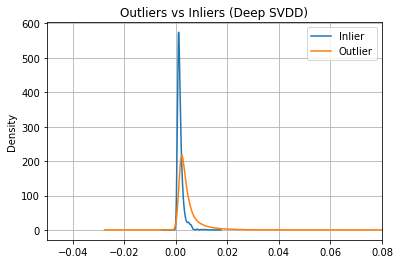

In [7]:
import matplotlib.pyplot as plt
import pandas as pd 

scores_in = scores[np.where(labels==0)[0]]
scores_out = scores[np.where(labels==1)[0]]


in_ = pd.DataFrame(scores_in, columns=['Inlier'])
out_ = pd.DataFrame(scores_out, columns=['Outlier'])


fig, ax = plt.subplots()
in_.plot.kde(ax=ax, legend=True, title='Outliers vs Inliers (Deep SVDD)')
out_.plot.kde(ax=ax, legend=True)
plt.xlim(-0.05, 0.08)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()